# Open data analysis and model to predict the League of Legends World Championship (Python version)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#directory_changed = False ## un comment this only the first time this cell is run

if(directory_changed == False):
    current_path = os.getcwd()
    inputs_path = current_path + '/data'
    os.chdir(inputs_path)

train_file = 'train_data.csv'
test_file = 'test_data.csv'

directory_changed = True

In [2]:
train_df= pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [3]:
train_df.head()

,result,team,side,topwr_champ,jngwr_champ,midwr_champ,adcwr_champ,supwr_champ,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,1,Team WE,Blue,0.5000,0.4954,0.4928,0.5008,0.5318,0.581536,0.596491,0.656250,0.619048,1.000000
1,0,Lyon Gaming,Red,0.5000,0.5046,0.5072,0.4992,0.4682,0.545455,0.777778,0.500000,0.000000,0.600000
2,1,Cloud9,Blue,0.4391,0.4966,0.5562,0.5008,0.4786,0.700000,0.563228,0.733333,0.555556,0.636364
3,0,Team oNe Esports,Red,0.5609,0.5034,0.4438,0.4992,0.5214,0.500000,0.500000,0.000000,0.000000,0.000000
4,0,Gambit Esports,Blue,0.4837,0.4750,0.3970,0.4912,0.4950,0.333333,0.588235,0.500000,0.500000,0.500000


In [4]:
test_df.head()

,result,team,side,topwr_champ,jngwr_champ,midwr_champ,adcwr_champ,supwr_champ,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,0,Longzhu Gaming,Blue,0.4809,0.5204,0.4417,0.4912,0.4975,0.875000,0.333333,0.285714,0.500000,0.660000
1,1,Samsung Galaxy,Red,0.5191,0.4796,0.5583,0.5088,0.5025,0.529412,0.750000,1.000000,0.461538,0.750000
2,0,Longzhu Gaming,Blue,0.5000,0.5204,0.5003,0.4878,0.4876,0.508497,0.333333,0.666667,0.500000,0.357143
3,1,Samsung Galaxy,Red,0.5000,0.4796,0.4997,0.5122,0.5124,0.666667,0.750000,0.695652,0.461538,0.500000
4,1,Samsung Galaxy,Blue,0.4853,0.5222,0.4984,0.5122,0.5497,0.666667,0.750000,0.625000,0.461538,0.500000


We need to convert the *team* and *side* variables to cathegorical variables

In [8]:
train_df["team"] = train_df["team"].astype("category")
train_df["side"] = train_df["side"].astype("category")

In [17]:
teams = train_df["team"].unique()

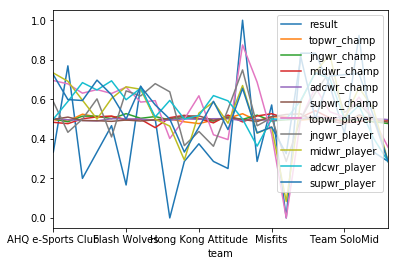

In [16]:
mean_df = train_df.groupby('team').mean()
%matplotlib inline
plt.figure(); mean_df.plot(); plt.legend(loc='best')

We are going to substitute the *team* feature by the *region* feature. There are 12 different
regions where each team can play. Thus we are reducing the dimensionality of *team* from 24
to 12.

Regions and teams available at: https://lol.gamepedia.com/2017_Season_World_Championship

The regions of teams that were not classified to the Groups stage during the Play-in stage are included all
in the region catheogry "Other".


In [19]:
for team in teams:
    print(team)

Team WE
Lyon Gaming
Cloud9
Team oNe Esports
Gambit Esports
Dire Wolves
Young Generation
Kaos Latin Gamers
Rampage
Hong Kong Attitude
Fnatic
Fenerbahce Esports
Royal Never Give Up
G2 Esports
Samsung Galaxy
Longzhu Gaming
Immortals
Gigabyte Marines
SK Telecom T1
EDward Gaming
AHQ e-Sports Club
Flash Wolves
Team SoloMid
Misfits


In [23]:
team2region = {
    'Team WE': 'CN',
    'Lyon Gaming': 'Other',
    'Cloud9': 'NA',
    'Team oNe Esports': 'Other',
    'Gambit Esports': 'Other',
    'Dire Wolves': 'Other',
    'Young Generation': 'Other',
    'Kaos Latin Gamers': 'Other',
    'Rampage': 'Other',
    'Hong Kong Attitude': 'TW',
    'Fnatic': 'EU',
    'Fenerbahce Esports': 'TR',
    'Royal Never Give Up': 'CN',
    'G2 Esports': 'EU',
    'Samsung Galaxy': 'KR',
    'Longzhu Gaming': 'KR',
    'Immortals': 'NA',
    'Gigabyte Marines': 'SEA',
    'SK Telecom T1': 'KR',
    'EDward Gaming': 'CN',
    'AHQ e-Sports Club': 'TW',
    'Flash Wolves': 'TW',
    'Team SoloMid': 'NA',
    'Misfits': 'EU'
}

In [24]:
team2region['Team WE']

'CN'

In [50]:
regions = train_df.replace({"team": team2region})['team']
train_df["region"] = regions
test_df["region"] = regions

In [51]:
train_df["region"].head()

0       CN
1    Other
2       NA
3    Other
4    Other
Name: region, dtype: object

In [52]:
features = ['result', 'side', 'region', 'topwr_player', 'jngwr_player',
            'midwr_player','adcwr_player','supwr_player' ]
train_df2 = train_df.loc[:,features]
test_df2 = test_df.loc[:,features]

In [53]:
train_df2.head()

,result,side,region,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,1,Blue,CN,0.581536,0.596491,0.656250,0.619048,1.000000
1,0,Red,Other,0.545455,0.777778,0.500000,0.000000,0.600000
2,1,Blue,NA,0.700000,0.563228,0.733333,0.555556,0.636364
3,0,Red,Other,0.500000,0.500000,0.000000,0.000000,0.000000
4,0,Blue,Other,0.333333,0.588235,0.500000,0.500000,0.500000


In [54]:
test_df2.head()

,result,side,region,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,0,Blue,CN,0.875000,0.333333,0.285714,0.500000,0.660000
1,1,Red,Other,0.529412,0.750000,1.000000,0.461538,0.750000
2,0,Blue,NA,0.508497,0.333333,0.666667,0.500000,0.357143
3,1,Red,Other,0.666667,0.750000,0.695652,0.461538,0.500000
4,1,Blue,Other,0.666667,0.750000,0.625000,0.461538,0.500000
